In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


**We first create image generator which rescales them and does a little distortions on images so that we have better training samples. After that, we import images from their directories.**

In [2]:
data_dir = './data/'


im_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, height_shift_range=0.2, vertical_flip = True, validation_split = 0.2)
train_gen = im_gen.flow_from_directory(data_dir, target_size=(224, 224), batch_size = 32, class_mode = "categorical", shuffle = True)
val_gen = im_gen.flow_from_directory(data_dir, target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=False, subset = 'validation')


Found 2187 images belonging to 3 classes.
Found 436 images belonging to 3 classes.


In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224,224,3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(3, activation = "softmax")
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [5]:
model.compile(loss = "categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

In [6]:
history = model.fit(train_gen, epochs = 15, validation_data = val_gen)

Epoch 1/15
69/69 [==============================] - 281s 4s/step - loss: 1.0962 - accuracy: 0.3653 - val_loss: 1.0888 - val_accuracy: 0.5069
Epoch 2/15
69/69 [==============================] - 224s 3s/step - loss: 1.0818 - accuracy: 0.4458 - val_loss: 1.0601 - val_accuracy: 0.6239
Epoch 3/15
69/69 [==============================] - 223s 3s/step - loss: 1.0210 - accuracy: 0.5359 - val_loss: 0.9505 - val_accuracy: 0.4794
Epoch 4/15
69/69 [==============================] - 222s 3s/step - loss: 0.8773 - accuracy: 0.6456 - val_loss: 0.9877 - val_accuracy: 0.5596
Epoch 5/15
69/69 [==============================] - 223s 3s/step - loss: 0.7120 - accuracy: 0.7110 - val_loss: 0.6254 - val_accuracy: 0.7546
Epoch 6/15
69/69 [==============================] - 221s 3s/step - loss: 0.6014 - accuracy: 0.7705 - val_loss: 0.7058 - val_accuracy: 0.6697
Epoch 7/15
69/69 [==============================] - 228s 3s/step - loss: 0.5129 - accuracy: 0.8029 - val_loss: 0.4354 - val_accuracy: 0.8326
Epoch 8/15
69

In [7]:
model.save("rock_paper_scissors.h5")

In [8]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)


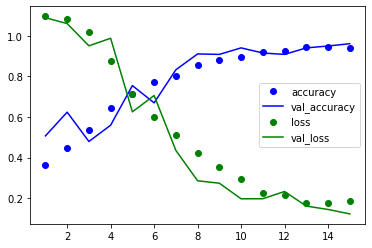

In [9]:
plt.plot(epochs, acc, 'bo', label="accuracy")
plt.plot(epochs, val_acc, 'b', label="val_accuracy")
plt.plot(epochs, loss, 'go', label="loss")
plt.plot(epochs, val_loss, 'g', label="val_loss")
plt.legend()
plt.show()


In [10]:
def classes(prediction):
    if prediction[0][0] == 1:
        return 'Scissors'
    elif prediction[0][1] == 1:
        return 'Rock'
    else:
        return 'Paper'

In [14]:
import numpy as np
from keras.preprocessing import image

img_path = 'scissors.png'
img = image.load_img(img_path, target_size = (224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
img /= 255
prediction = (model.predict(img) > 0.5).astype("int32")
classes(prediction)


'Scissors'

In [21]:
img_path2 = 'rock.jpg'
img2 = image.load_img(img_path2, target_size = (224,224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis = 0)
img2 /= 255
prediction2 = (model.predict(img2) > 0.5).astype("int32")
prediction2

array([[1, 0, 0]])